In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [148]:
df = pd.read_csv('../.dataset/FakeNewsNet.csv')

In [149]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [150]:
df.describe()

,tweet_num,real
count,23196.000000,23196.000000
mean,88.956803,0.751897
std,488.694592,0.431921
min,0.000000,0.000000
25%,11.000000,1.000000
50%,37.000000,1.000000
75%,65.000000,1.000000
max,29060.000000,1.000000


In [151]:
df.sample(5)

,title,news_url,source_domain,tweet_num,real
3277,"Amy Sedaris, a Hobo, Patty Hogg & Jerri Blank ...",http://www.trueara.com/amy-sedaris-a-hobo-patt...,www.trueara.com,43,1
23142,Deborra-Lee Furness Net Worth,https://www.celebritynetworth.com/richest-cele...,www.celebritynetworth.com,0,1
13351,Search Warrants Reveal Prince Had Mislabeled P...,https://staging.omgcheckitout.com/search-warra...,staging.omgcheckitout.com,64,1
11635,JAY-Z Reveals He Cried When His Mother Came Ou...,https://www.etonline.com/jay-z-reveals-he-crie...,www.etonline.com,0,1
8251,Eleanor Confronts King Robert About Jasper on ...,https://www.onenewspage.com/n/Entertainment/1z...,www.onenewspage.com,12,1


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB


In [153]:
df.duplicated().sum()

np.int64(137)

In [154]:
df = df.drop_duplicates()

In [155]:
df = df.drop(['news_url'],axis=1)

In [156]:
# sns.countplot(x=df['source_domain'])
# plt.show()

In [157]:
df = df.drop(['source_domain'],axis=1)

In [158]:
df = df.drop(['tweet_num'], axis=1)

In [159]:
# sns.scatterplot(df['tweet_num'])
# plt.show()

In [160]:
df['real'].unique()

array([1, 0])

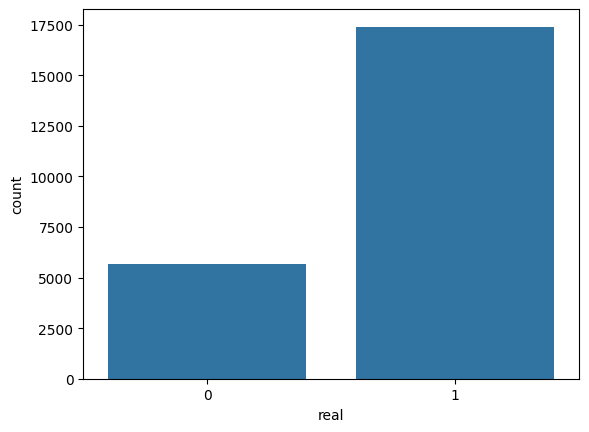

In [161]:
sns.countplot(x=df['real'])
plt.show()

In [162]:
df['title'][:6]

0    Kandi Burruss Explodes Over Rape Accusation on...
1    People's Choice Awards 2018: The best red carp...
2    Sophia Bush Sends Sweet Birthday Message to 'O...
3    Colombian singer Maluma sparks rumours of inap...
4    Gossip Girl 10 Years Later: How Upper East Sid...
5    Gwen Stefani Got Dumped by Blake Shelton Over ...
Name: title, dtype: object

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23059 entries, 0 to 23195
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23059 non-null  object
 1   real    23059 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 540.4+ KB


In [164]:
df['text'] = df['title']
df['category'] = df['real']

In [165]:
df = df.drop(['title','real'], axis=1)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23059 entries, 0 to 23195
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      23059 non-null  object
 1   category  23059 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 540.4+ KB


In [167]:
df.isna().sum()

text        0
category    0
dtype: int64

In [168]:
df.isnull().sum()

text        0
category    0
dtype: int64

In [169]:
df = pd.DataFrame(df)

In [170]:
empty = []

for i , t in df['text'].items():
    if isinstance(t,str) and t.isspace():
        empty.append(i)

print(f"empty strings: {len(empty)}")


empty strings: 0


In [171]:
import spacy

nlp = spacy.load('en_core_web_sm')

def clean_text(texts):
    for text in texts:
        doc = nlp(text)
        clean_lemat = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.like_num]
    return clean_lemat
    


df['text'] = df['text'].apply(clean_text)

KeyboardInterrupt: 

In [ ]:
df['text'].sample(6)

19174    [l]
15508    [s]
18432    [t]
6900     [d]
5084     [w]
7481      []
Name: text, dtype: object

In [ ]:
y = df['category']

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=69,stratify=y)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")

tokenizer.fit_on_texts(df['text'])

sequences = tokenizer.texts_to_sequences(df['text'])

max_length = 500

X = pad_sequences(sequences, maxlen=max_length , padding='post')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.kerras.layers import Embedding , LSTM , Dense , Dropout

model = Sequential([
    Embedding(vocab_size , 64 , input_length=max_length),

    LSTM(128, dropout=0.2, recurrent_dropout=0.2),

    Dense(1 , activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

In [ ]:
model.fit()